In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Ecommerce')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

c:\pyproj\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


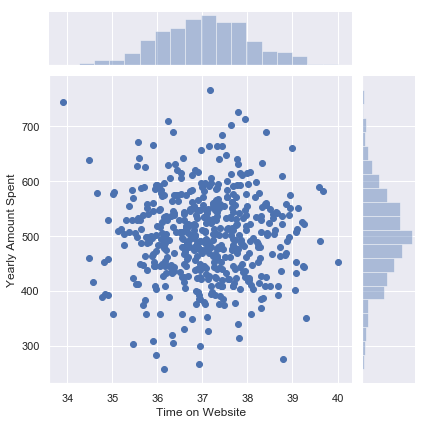

In [7]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df)

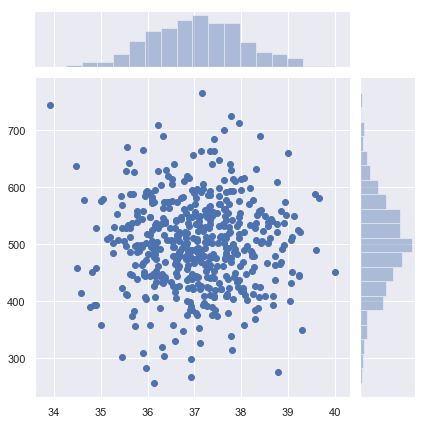

In [11]:
sns.jointplot(x=np.array(df["Time on Website"]), y=np.array(df["Yearly Amount Spent"]), data=df)
plt.show()

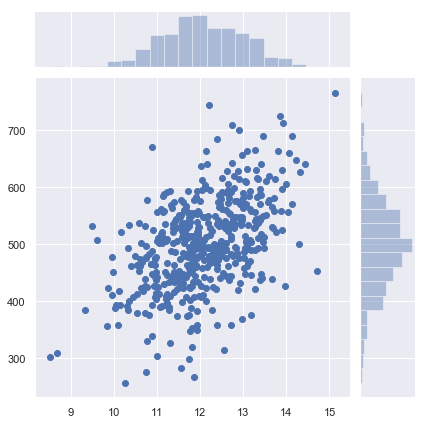

In [12]:
sns.jointplot(x=np.array(df["Time on App"]), y=np.array(df["Yearly Amount Spent"]), data=df)
plt.show()

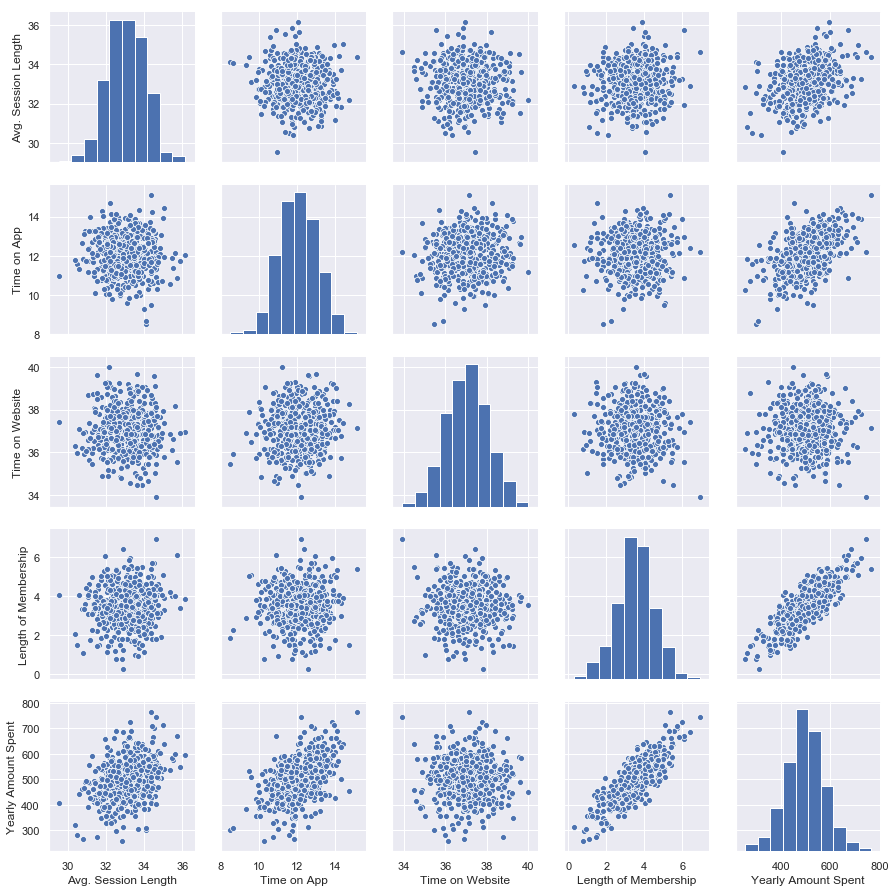

In [13]:
sns.pairplot(df)

In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

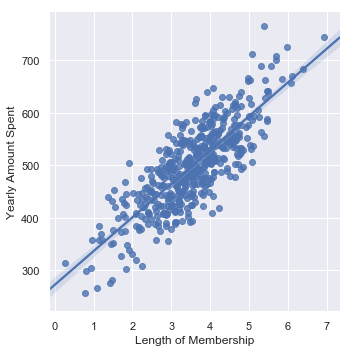

In [24]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df);

In [25]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [26]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.coef_

array([25.89535967, 38.84416514,  0.9679482 , 61.86922459])

In [34]:
pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coef'])

,Coef
Avg. Session Length,25.895360
Time on App,38.844165
Time on Website,0.967948
Length of Membership,61.869225


In [35]:
predictions = lm.predict(X_test)

In [36]:
predictions

array([685.64581971, 497.52571284, 599.40518719, 610.16915969,
       585.3433224 , 477.82352511, 543.79384082, 575.29769282,
       751.95787541, 468.64775795, 506.23327984, 558.89455221,
       553.44717143, 493.6951399 , 530.91973618, 433.61902174,
       543.23261586, 562.35723335, 421.01567763, 407.83301548,
       544.30405026, 450.91736104, 499.64588949, 507.32473776,
       693.58354511, 434.74197585, 527.12541515, 466.05269441,
       493.64815526, 478.00284936, 563.2659512 , 487.07384366,
       481.1804113 , 507.92070924, 514.93623908, 539.12236446,
       421.58301376, 471.53781507, 510.47674745, 507.38373652,
       503.4563405 , 551.92184401, 641.79590901, 433.76440996,
       704.41428746, 606.95095569, 658.18407215, 766.98554128,
       577.17613698, 445.03052124, 473.69953761, 504.20623512,
       601.741419  , 490.88103581, 552.19221517, 489.42835098,
       429.85210265, 558.69605136, 431.45771142, 556.89258549,
       401.40959756, 421.1216972 , 546.61734154, 564.86

In [37]:
y_test

151    684.163431
424    491.911505
154    595.803819
190    612.385230
131    573.306222
310    479.614812
266    554.003093
495    573.847438
157    744.221867
282    475.263424
452    521.195311
152    555.892595
164    550.047581
219    496.933446
351    533.396554
433    434.144202
43     547.244343
47     563.672873
467    436.580740
208    412.012931
398    537.825282
437    445.749841
474    492.556834
236    501.928265
368    708.935185
129    431.617734
230    532.935219
345    461.790959
163    490.206600
336    478.600916
          ...    
295    432.720718
214    357.863719
99     495.299443
245    409.070472
468    553.994674
324    559.199048
252    426.154548
441    510.539422
427    581.798798
70     444.966552
188    524.637965
381    547.190749
281    560.443792
175    373.885724
80     489.812488
435    571.216005
438    392.992256
146    463.484995
307    441.896632
126    516.831557
367    407.657179
56     520.898794
37     490.738632
66     553.601535
458    537

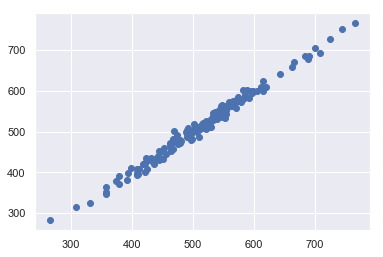

In [38]:
plt.scatter(y_test, predictions)

In [40]:
from sklearn import metrics

In [41]:
'MAE : ',  metrics.mean_absolute_error(y_test, predictions)

('MAE : ', 7.896670984962893)

In [42]:
'MSE : ', metrics.mean_squared_error(y_test, predictions)

('MSE : ', 93.83097002877341)

In [43]:
'RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('RMSE : ', 9.686638737393555)